# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109B Data Science 2: Advanced Topics in Data Science 

## Homework 5: Autoencoders 

**Harvard University**<br/>
**Spring 2020**<br/>
**Instructors:** Pavlos Protopapas, Mark Glickman, Chris Tanner<br/>

<hr style="height:2pt">

In [1]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

In [2]:
#RUN THIS CELL
import os
import pathlib
working_dir = pathlib.Path().absolute()
os.chdir(working_dir)

<hr style="height:2pt">

### INSTRUCTIONS

- To submit your assignment follow the instructions given in Canvas.

- This homework can be submitted in pairs.

- Please restart the kernel and run the entire notebook again before you submit.

<hr style="height:2pt">

In [3]:
import numpy as np
import seaborn as sns

from matplotlib import pyplot
import matplotlib.pylab as plt 
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Reshape
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.optimizers import Adam, SGD


<div class="theme"> Overview </div> 


In this homework, we will investigate autoencoders, how they are related to PCA (and in doing so, show that they can be a more powerful extension of this technique), and one possible application of autoencoders for outlier detection.

<div class='exercise'><b> Question 1: Autoencoders and MNIST [50pts total] </b></div>

For this question, we will be using the [MNIST Dataset](https://en.wikipedia.org/wiki/MNIST_database) of handwritten digits, a simple standardized image dataset. The dataset consists of single-channel (black and white) 28x28 images, containing one digit each. We will see if it is feasible to encode (compress, in this case) the images into just 2 dimensions, a substantial compression ratio considering that the original vector has dimension 28x28=784.

**1.1** [1pts] Load MNIST using `tf.keras.datasets.mnist.load_data()`, saving the training data as `x_train` and `y_train`, and the test data as `x_test`, `y_test`. Normalize the images to the range [0.,1.] by dividing by 255.

**1.2** [1pts] Use `imshow` to show one image of your choice from the train set, specifying `cmap='gray'` to show the image in black and white.

**1.3** [2pts] Construct and instance of `sklearn`'s `PCA` class, specifying that it only use the first 2 PCA components. Fit to `x_train` (Hint: you will need to use `reshape`), and project `x_train` down to its first 2 PCA components, saving the new array of shape (N,2) to `pca_latent_train`. This is the representation of all the images in `x_train` in a 2D latent space.

**1.4** [2pts] Make a scatterplot of `pca_latent_train` with the point color designated by the corresponding class labels. Pick a reasonable color palette with enough of a contrast to clearly distinguish classes. 

**1.5** [8pts] Linear Autoencoder. Construct an encoder-decoder network with **linear activations** only, and **no biases**. The encoder and decoder should consist of one dense layer each, and the bottleneck dimension should be 2. The encoder and decoder should be their own separate models called `linear_encoder` and `linear_decoder`. Create the full linear autoencoder, call it `lae`, out of the encoder and decoder. Use a mean-squared-error reconstruction loss. Print the `summary()` for both the encoder and decoder networks, as well as the summary for the full linear autoencoder.

**1.6** [4pts] Train your linear autoencoder `lae` on the train data, using `x_test` as validation data. Use enough epochs such that the training loss plateaus. Plot the train loss and validation (equivalent to test, in this case) loss as a function of epoch, in the same figure.

**1.7** [3pts] Compute the `linear_encoder`'s latent space representation of `x_train`, calling the resulting array `lae_latent_train`. Create two scatterplots, side by side, using `subplots`, showing `pca_latent_train` (from **1.4**) and `lae_latent_train`, with points colored according to class label. Don't forget to title the two figures.

**1.8** [3pts] What do you notice about the latent space representations in PCA and the LAE (linear autoencoder)? Does either one do a substantially better job at separating the 10 classes in the 2D latent space? --- *Bonus, but for no additional points: prove a relationship between the latent space representation in PCA and LAE for the same bottleneck dimension.*

**1.9** [3pts] What do you expect to happen if you added more dense layers (no biases) with only linear activations to your `linear_encoder` and `linear_decoder`? Would you expect a better reconstruction error?

**1.10** [8pts] Construct a nonlinear (regular) autoencoder with at least 2 dense layers, with biases, in both the encoder and decoder parts. Call the encoder network `encoder` and the decoder network `decoder`, and the full autoencoder `ae`. Print the summaries for `encoder`, `decoder`, and `ae`.

**1.11** [4pts] Train your autoencoder on `x_train`, using `x_test` as validation data. Train it for a reasonable number of epochs, using your best judgement on what that entails. As usual, plot the train loss and validation loss as a function of epoch.

**1.12** [3pts] Compute the `encoder`'s latent space representation of `x_train`, calling the resulting array `ae_latent_train`. Plot the scatterplots of `pca_latent_train`, `lae_latent_train`, and `ae_latent_train` in a row using `subplots` so we can see them all simultaneously. What do you notice?

**1.13** [6pts] Comparing reconstructed images. You will create arrays containing the reconstructed `x_test` using PCA, the linear autoencoder, and the regular autoencoder. For PCA, be sure to use the `pca` object you created and fit in **1.3** on the *train* data. You will project `x_test` onto its 2D latent space representation, and then convert it back, saving the result as `pca_recons_x_test`. For the linear autoencoder and the regular autoencoder, save the reconstructed `x_test` as `lae_recons_x_test` and `ae_recons_x_test` respectively. Now, you will create a 6 row by 4 column collection of subplots. Each row will correspond to an element of the test set (of your choice), with the columns being the PCA reconstruction, the LAE reconstruction, the AE reconstruction, and the original image. Be sure to title the subplots with 'PCA', 'LAE', 'AE', 'Original'. 

**1.14** [2pts] Finally, using `sklearn.metrics`'s `mean_squared_error`, report the average reconstruction error across the entire test set for PCA, LAE, and AE. Does the ordering agree with what you've seen in the previous questions? Does it support your conclusion in **1.8**?



## Answers

**1.1** [1pts] Load MNIST using `tf.keras.datasets.mnist.load_data()`, saving the training data as `x_train` and `y_train`, and the test data as `x_test`, `y_test`. Normalize the images to the range [0.,1.] by dividing by 255.


In [4]:
# your code here

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train/255.0
x_test = x_test/255.0

print("Shape of Training Set = {}".format(x_train.shape))
print("Shape of Training Labels = {}".format(y_train.shape))

print("Shape of Test Set = {}".format(x_test.shape))
print("Shape of Test Labels = {}".format(y_test.shape))

print("Min of x_train = {}".format(x_train.min()))
print("Max of x_train = {}".format(x_train.max()))

print("Min of x_test = {}".format(x_test.min()))
print("Min of x_test = {}".format(x_test.max()))

print("Training Labels = {}\nLabel Counts = {}".format(np.unique(y_train, return_counts=True)[0], 
                                                  np.unique(y_train, return_counts=True)[1]))

Shape of Training Set = (60000, 28, 28)
Shape of Training Labels = (60000,)
Shape of Test Set = (10000, 28, 28)
Shape of Test Labels = (10000,)
Min of x_train = 0.0
Max of x_train = 1.0
Min of x_test = 0.0
Min of x_test = 1.0
Training Labels = [0 1 2 3 4 5 6 7 8 9]
Label Counts = [5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]


<div class='alert alert-block' style='border-color:rgb(201, 201, 201); border-style:dashed; border-width: 3px'><div class='alert alert-block alert-primary'><b>Question : </b><span style = 'color:black'>Q1.1
</span></div><div class='alert alert-block alert-info'><b>Comments : </b><span style = 'color:black'>Correct
</span></div></div>

**1.2** [1pts] Use `imshow` to show one image of your choice from the train set, specifying `cmap='gray'` to show the image in black and white.


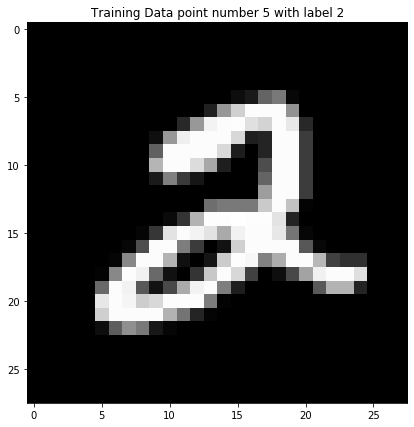

In [5]:
# your code here

plt.figure(figsize=(7,7))
plt.imshow(x_train[5,:,:], cmap='gray')
plt.title("Training Data point number {} with label {}".format(5, y_train[5]))
plt.show()

<div class='alert alert-block' style='border-color:rgb(201, 201, 201); border-style:dashed; border-width: 3px'><div class='alert alert-block alert-primary'><b>Question : </b><span style = 'color:black'>Q1.2
</span></div><div class='alert alert-block alert-info'><b>Comments : </b><span style = 'color:black'>Correct
</span></div></div>

**1.3** [2pts] Construct and instance of `sklearn`'s `PCA` class, specifying that it only use the first 2 PCA components. Fit to `x_train` (Hint: you will need to use `reshape`), and project `x_train` down to its first 2 PCA components, saving the new array of shape (N,2) to `pca_latent_train`. This is the representation of all the images in `x_train` in a 2D latent space.


In [6]:
# your code here

pca = PCA(n_components=2)
pca_latent_train = pca.fit_transform(x_train.reshape((x_train.shape[0], -1)))
pca_latent_test = pca.transform(x_test.reshape((x_test.shape[0], -1)))

print("Shape of pca_latent_train = {}".format(pca_latent_train.shape))
print("Shape of pca_latent_test = {}".format(pca_latent_test.shape))

Shape of pca_latent_train = (60000, 2)
Shape of pca_latent_test = (10000, 2)


<div class='alert alert-block' style='border-color:rgb(201, 201, 201); border-style:dashed; border-width: 3px'><div class='alert alert-block alert-primary'><b>Question : </b><span style = 'color:black'>Q1.3
</span></div><div class='alert alert-block alert-info'><b>Comments : </b><span style = 'color:black'>Correct
</span></div></div>

**1.4** [2pts] Make a scatterplot of `pca_latent_train` with the point color designated by the corresponding class labels. Pick a reasonable color palette with enough of a contrast to clearly distinguish classes.


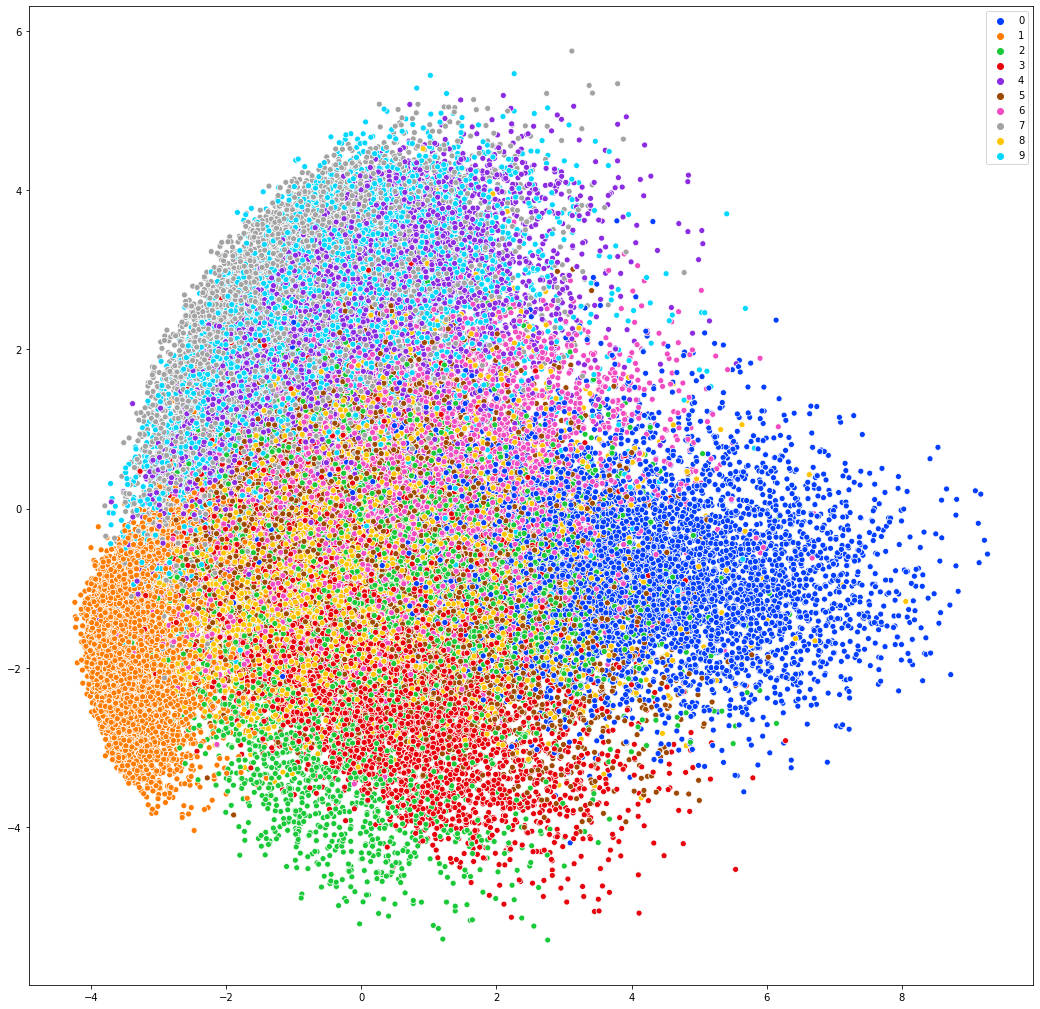

In [7]:
# your code here

import seaborn as sns

fig = plt.figure(figsize=(18, 18))
sns.scatterplot(pca_latent_train[:,0],
                pca_latent_train[:,1],
                palette=sns.color_palette("bright", 10),
                hue=y_train
               )
plt.show()

<div class='alert alert-block' style='border-color:rgb(201, 201, 201); border-style:dashed; border-width: 3px'><div class='alert alert-block alert-primary'><b>Question : </b><span style = 'color:black'>Q1.4
</span></div><div class='alert alert-block alert-info'><b>Comments : </b><span style = 'color:black'>Correct
</span></div></div>

**1.5** [8pts] Linear Autoencoder. Construct an encoder-decoder network with **linear activations** only, and **no biases**. The encoder and decoder should consist of one dense layer each, and the bottleneck dimension should be 2. The encoder and decoder should be their own separate models called `linear_encoder` and `linear_decoder`. Create the full linear autoencoder, call it `lae`, out of the encoder and decoder. Use a mean-squared-error reconstruction loss. Print the `summary()` for both the encoder and decoder networks, as well as the summary for the full linear autoencoder.


In [8]:
# your code here

tf.keras.backend.clear_session()

input_dim = x_train.shape[1:]
encoding_dim = 2  


linear_encoder = Sequential(name='Linear_Encoder')
linear_encoder.add(Input(shape=(input_dim)))
linear_encoder.add(Flatten())
linear_encoder.add(Dense(encoding_dim, use_bias=False, activation='linear'))


linear_decoder = Sequential(name='Linear_Decoder')
linear_decoder.add(Input(shape=(encoding_dim,)))
linear_decoder.add(Dense(input_dim[0]*input_dim[1], use_bias=False, activation='linear'))
linear_decoder.add(Reshape(target_shape=input_dim))


lae = Sequential()
lae.add(Input(shape=(input_dim)))
lae.add(linear_encoder)
lae.add(linear_decoder)


print(linear_encoder.summary())
print(linear_decoder.summary())
print(lae.summary())

Model: "Linear_Encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 2)                 1568      
Total params: 1,568
Trainable params: 1,568
Non-trainable params: 0
_________________________________________________________________
None
Model: "Linear_Decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 784)               1568      
_________________________________________________________________
reshape (Reshape)            (None, 28, 28)            0         
Total params: 1,568
Trainable params: 1,568
Non-trainable params: 0
_________________________________________________________________
None
Model: "sequen

In [9]:
# your code here

opt = tf.keras.optimizers.Adam(lr = 0.0001)
lae.compile(optimizer=opt, loss='mse')

<div class='alert alert-block' style='border-color:rgb(201, 201, 201); border-style:dashed; border-width: 3px'><div class='alert alert-block alert-primary'><b>Question : </b><span style = 'color:black'>Q1.5
</span></div><div class='alert alert-block alert-info'><b>Comments : </b><span style = 'color:black'>Correct
</span></div></div>

**1.6** [4pts] Train your linear autoencoder `lae` on the train data, using `x_test` as validation data. Use enough epochs such that the training loss plateaus. Plot the train loss and validation (equivalent to test, in this case) loss as a function of epoch, in the same figure.


In [10]:
# your code here

import pickle
from tensorflow.keras.callbacks import EarlyStopping

x_mean = x_train.mean(axis=0)
try:
    lae.load_weights('./model/lae')
    _history = pickle.load(open( "./model/trainHistoryDictLAE", "rb" ))
except:   
    history = lae.fit(x_train-x_mean, x_train-x_mean,
                      epochs=100,
                      batch_size=8,
                      shuffle=True,
                      validation_data=(x_test-x_mean, x_test-x_mean),
                      verbose = 0,
                      callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]
                     )
    
    lae.save_weights('./model/lae')
    
    with open('./model/trainHistoryDictLAE', 'wb') as file_pi:
        pickle.dump(history.history, file_pi)
    
    _history = history.history

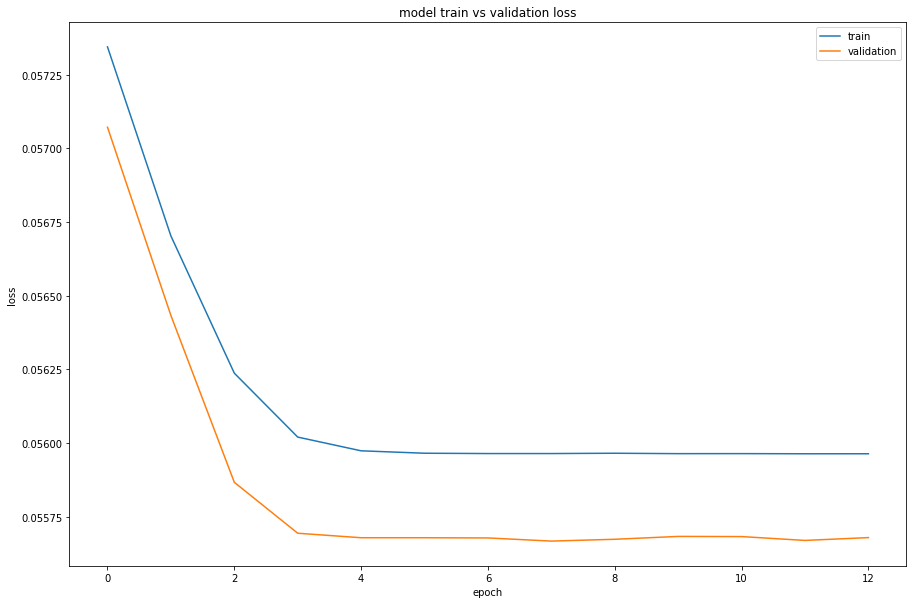

In [11]:
# your code here

plt.figure(figsize=(15, 10))
plt.plot(_history['loss'])
plt.plot(_history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

<div class='alert alert-block' style='border-color:rgb(201, 201, 201); border-style:dashed; border-width: 3px'><div class='alert alert-block alert-primary'><b>Question : </b><span style = 'color:black'>Q1.6
</span></div><div class='alert alert-block alert-info'><b>Comments : </b><span style = 'color:black'>Correct
</span></div></div>

**1.7** [3pts] Compute the `linear_encoder`'s latent space representation of `x_train`, calling the resulting array `lae_latent_train`. Create two scatterplots, side by side, using `subplots`, showing `pca_latent_train` (from **1.4**) and `lae_latent_train`, with points colored according to class label. Don't forget to title the two figures.


In [12]:
# your code here

lae_latent_train = linear_encoder.predict(x_train-x_mean)
lae_latent_train.shape

(60000, 2)

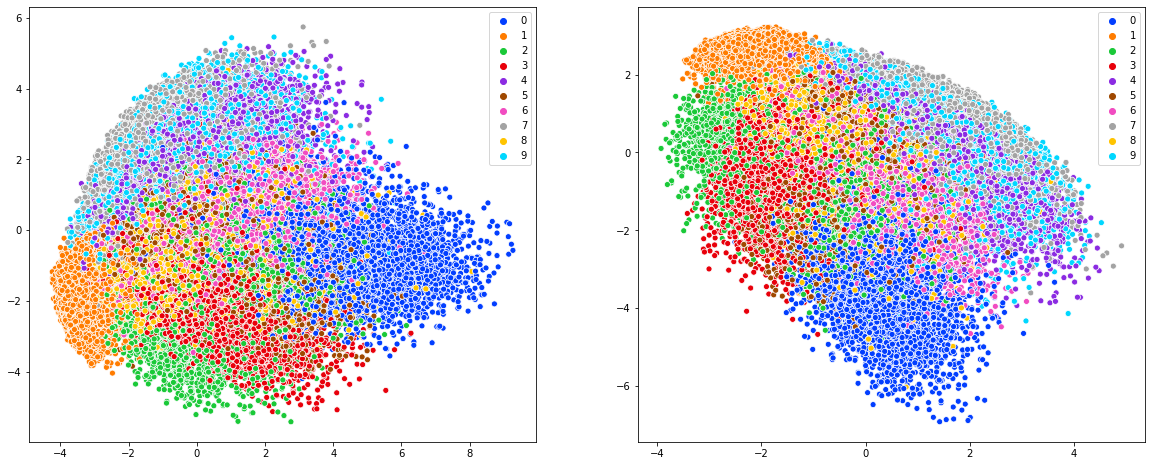

In [13]:
# your code here

fig = plt.figure(figsize=(20, 8))
plt.subplot(1,2,1)
sns.scatterplot(pca_latent_train[:,0],
                pca_latent_train[:,1],
                palette=sns.color_palette("bright", 10),
                hue=y_train
               )

plt.subplot(1,2,2)
sns.scatterplot(lae_latent_train[:,0],
                lae_latent_train[:,1],
                palette=sns.color_palette("bright", 10),
                hue=y_train
               )
plt.show()

<div class='alert alert-block' style='border-color:rgb(201, 201, 201); border-style:dashed; border-width: 3px'><div class='alert alert-block alert-primary'><b>Question : </b><span style = 'color:black'>Q1.7
</span></div><div class='alert alert-block alert-info'><b>Comments : </b><span style = 'color:black'>Correct
</span></div></div>

**1.8** [3pts] What do you notice about the latent space representations in PCA and the LAE (linear autoencoder)? Does either one do a substantially better job at separating the 10 classes in the 2D latent space? --- *Bonus, but for no additional points: prove a relationship between the latent space representation in PCA and LAE for the same bottleneck dimension.*


<div style="border: 2px solid red; padding: 10px"> 

***Latent space representations in PCA and the LAE:***

* The difference between PCA and autoencoder is that PCA is restricted to a linear map, while autoencoder can have linear/nonlinear representation. 
* However, since in our case we use LAE (linear autoencoder i.e. linear activation), our autoencoder is now restricted to linear representation for the image as well. 
* The weights of a linear autoencoder span the same subspace as the principal components found by PCA, they are not the same vectors.
* PCA will show the orthogonal basis while LAE won't.
* This is why we see in the above plot, the scatter points occupy different places, i.e. LAE plot is just a rotation of PCA plot

**In the above case, using the first 2 principle components, PCA and LAE seems to do an exactly similar job at separating the 10 classes in 2D latent space and the performance of both is equally bad.**

<br>
<br>

***Relationship between the latent space representation in PCA and LAE for the same bottleneck dimension:***

* We can actually retrieve the first $m$ principle components from the first $m$ vectors in the linear autoencoder weights 
* PCA is essentially equivalent to the linear autoencoder with MSE loss. 

**PCA:**

Let's consider $x$ as the original data, $z$ the reduced data and $x'$ the reconstructed data from the reduced representation. Then we can write pca as:
$$z = B^Tx$$
$$x' = Bz$$

**Linear Autoencoder:**

Let's consider the autoencoder that transform $x \rightarrow z \rightarrow x'$ (so the linear encoder transform $x \rightarrow z$ and the linear decoder transform $z \rightarrow x'$).
Since the activation function is linear with no biases, we can write it as:
$$x' = W_1W_2x$$ where $W_1$ is the weight of the first layer (linear encoder), and $W_2$ is the weight of the second layer (linear decoder)

Now if we set $W_1$ as B and $W_2$ as $B^T$, we have:
$$x' = W_1(W_2x)$$
$$x' = W_1x$$
$$x' = Bx$$

**However, it is important to note that it is not necessary that linear auto-encoder with find $W_1 = B$ and $W_2 = B^T$.**

* **Linear autoencoder will require additional constraints to achieve that.**

<div class='alert alert-block' style='border-color:rgb(201, 201, 201); border-style:dashed; border-width: 3px'><div class='alert alert-block alert-primary'><b>Question : </b><span style = 'color:black'>Q1.8
</span></div><div class='alert alert-block alert-info'><b>Comments : </b><span style = 'color:black'>Good job
</span></div>
</div>

**1.9** [3pts] What do you expect to happen if you added more dense layers (no biases) with only linear activations to your `linear_encoder` and `linear_decoder`? Would you expect a better reconstruction error?


<div style="border: 2px solid red; padding: 10px"> 

***Adding more dense layers (no biases) with only linear activations to your linear_encoder and linear_decoder:***
* Adding more layers with linear layers will not have any impact on the encoder or decoder.
* This is becase, a linear transformation of a linear transformation is again a linear transformation.

***Reconstruction error will not improve by adding addtional linear layers:***
* Reconstrution error may become worse due to vanishing or exploding gradient issues.
* Reconstrution error may become worse due to floating point precision issues.

<div class='alert alert-block' style='border-color:rgb(201, 201, 201); border-style:dashed; border-width: 3px'><div class='alert alert-block alert-primary'><b>Question : </b><span style = 'color:black'>Q1.9
</span></div><div class='alert alert-block alert-info'><b>Comments : </b><span style = 'color:black'>Correct
</span></div></div>

**1.10** [8pts] Construct a nonlinear (regular) autoencoder with at least 2 dense layers, with biases, in both the encoder and decoder parts. Call the encoder network `encoder` and the decoder network `decoder`, and the full autoencoder `ae`. Print the summaries for `encoder`, `decoder`, and `ae`.


In [14]:
# your code here

input_dim = x_train.shape[1:]
encoding_dim = 2  


encoder = Sequential(name='Non_Linear_Encoder')
encoder.add(Input(shape=(input_dim)))
encoder.add(Flatten())
encoder.add(Dense(input_dim[0]*input_dim[1], activation='relu'))
encoder.add(Dense(encoding_dim, activation='relu'))


decoder = Sequential(name='Non_Linear_Decoder')
decoder.add(Input(shape=(encoding_dim,)))
decoder.add(Dense(input_dim[0]*input_dim[1], activation='relu'))
decoder.add(Dense(input_dim[0]*input_dim[1], activation='relu'))
decoder.add(Reshape(target_shape=input_dim))


ae = Sequential(name='Non_Linear_Autoencoder')
ae.add(Input(shape=(input_dim)))
ae.add(encoder)
ae.add(decoder)


print(encoder.summary())
print(decoder.summary())
print(ae.summary())

Model: "Non_Linear_Encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 1570      
Total params: 617,010
Trainable params: 617,010
Non-trainable params: 0
_________________________________________________________________
None
Model: "Non_Linear_Decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 784)               2352      
_________________________________________________________________
dense_5 (Dense)              (None, 784)               615440    
_________

<div class='alert alert-block' style='border-color:rgb(201, 201, 201); border-style:dashed; border-width: 3px'><div class='alert alert-block alert-primary'><b>Question : </b><span style = 'color:black'>Q1.10
</span></div><div class='alert alert-block alert-info'><b>Comments : </b><span style = 'color:black'>Good. See solutions for explanation on more appropriate activation functions on the output
</span></div></div>

**1.11** [4pts] Train your autoencoder on `x_train`, using `x_test` as validation data. Train it for a reasonable number of epochs, using your best judgement on what that entails. As usual, plot the train loss and validation loss as a function of epoch.


In [15]:
# your code here

opt = tf.keras.optimizers.Adam(lr = 0.001)
ae.compile(optimizer=opt, loss='mse')

try:
    ae.load_weights('./model/ae1')
    _history = pickle.load(open( "./model/trainHistoryDictAE1", "rb" ))
except:   
    history = ae.fit(x_train, x_train,
                     epochs=100,
                     batch_size=64,
                     shuffle=True,
                     validation_data=(x_test, x_test),
                     verbose = 0,
                     callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]
                    )
    
    ae.save_weights('./model/ae1')
    
    with open('./model/trainHistoryDictAE1', 'wb') as file_pi:
        pickle.dump(history.history, file_pi)
    
    _history = history.history

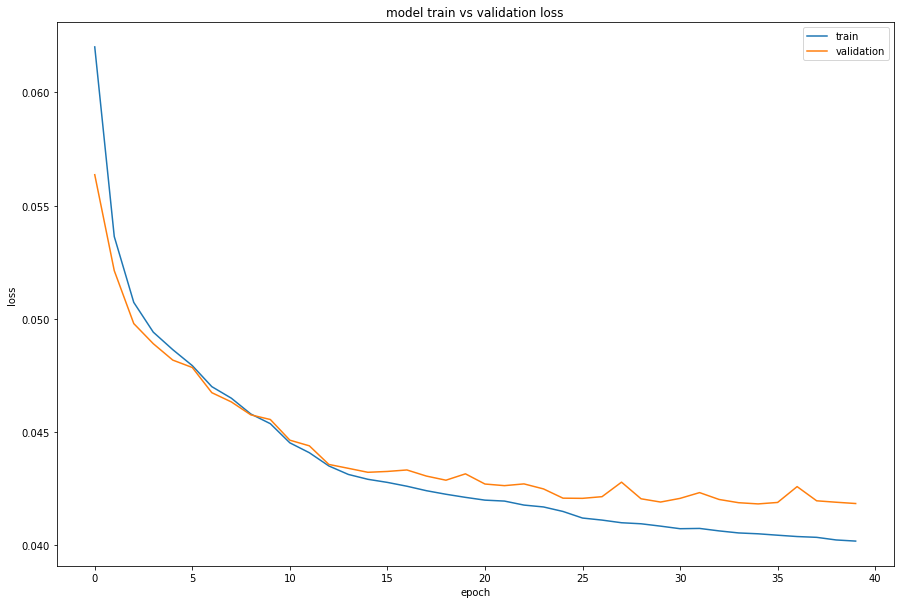

In [16]:
# your code here

plt.figure(figsize=(15, 10))
plt.plot(_history['loss'])
plt.plot(_history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

<div class='alert alert-block' style='border-color:rgb(201, 201, 201); border-style:dashed; border-width: 3px'><div class='alert alert-block alert-primary'><b>Question : </b><span style = 'color:black'>Q1.11
</span></div><div class='alert alert-block alert-info'><b>Comments : </b><span style = 'color:black'>Correct
</span></div></div>

**1.12** [3pts] Compute the `encoder`'s latent space representation of `x_train`, calling the resulting array `ae_latent_train`. Plot the scatterplots of `pca_latent_train`, `lae_latent_train`, and `ae_latent_train` in a row using `subplots` so we can see them all simultaneously. What do you notice?


In [17]:
# your code here

ae_latent_train = encoder.predict(x_train)
ae_latent_train.shape

(60000, 2)

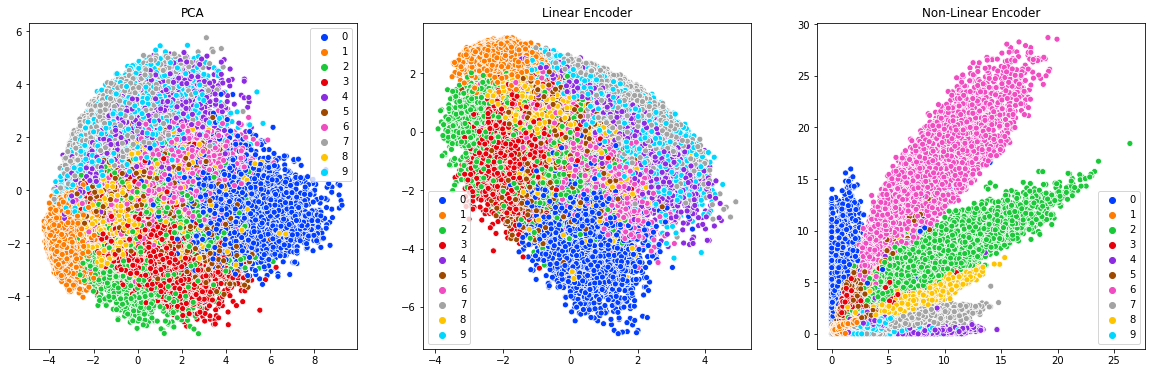

In [18]:
# your code here

fig = plt.figure(figsize=(20, 6))

ax1 = plt.subplot(1,3,1)
sns.scatterplot(pca_latent_train[:,0],
                pca_latent_train[:,1],
                palette=sns.color_palette("bright", 10),
                hue=y_train
               )
ax1.set_title('PCA')

ax2 = plt.subplot(1,3,2)
sns.scatterplot(lae_latent_train[:,0],
                lae_latent_train[:,1],
                palette=sns.color_palette("bright", 10),
                hue=y_train
               )
ax2.set_title('Linear Encoder')

ax3 = plt.subplot(1,3,3)
sns.scatterplot(ae_latent_train[:,0],
                ae_latent_train[:,1],
                palette=sns.color_palette("bright", 10),
                hue=y_train
               )
ax3.set_title('Non-Linear Encoder')

plt.show()

<div style="border: 2px solid red; padding: 10px"> 

***Observations:***
* PCA and Linear encoder both don't do good job of seperating the 10 categories; the seperation is exactly the same.
* Non-linear autoencoder does a much better job of seperating the 10 categories. 
* The latent space representation of x_train: The values are more spreadout and have less overlaps in case of non-linear autoencoder than PCA and LAE.

<div class='alert alert-block' style='border-color:rgb(201, 201, 201); border-style:dashed; border-width: 3px'><div class='alert alert-block alert-primary'><b>Question : </b><span style = 'color:black'>Q1.12
</span></div><div class='alert alert-block alert-info'><b>Comments : </b><span style = 'color:black'>Correct
</span></div></div>

**1.13** [6pts] Comparing reconstructed images. You will create arrays containing the reconstructed `x_test` using PCA, the linear autoencoder, and the regular autoencoder. For PCA, be sure to use the `pca` object you created and fit in **1.3** on the *train* data. You will project `x_test` onto its 2D latent space representation, and then convert it back, saving the result as `pca_recons_x_test`. For the linear autoencoder and the regular autoencoder, save the reconstructed `x_test` as `lae_recons_x_test` and `ae_recons_x_test` respectively. Now, you will create a 6 row by 4 column collection of subplots. Each row will correspond to an element of the test set (of your choice), with the columns being the PCA reconstruction, the LAE reconstruction, the AE reconstruction, and the original image. Be sure to title the subplots with 'PCA', 'LAE', 'AE', 'Original'.


In [19]:
# your code here

pca_recons_x_test = pca.inverse_transform(pca_latent_test).reshape(-1,28,28)
lae_recons_x_test = lae.predict(x_test - x_mean) + x_mean
ae_recons_x_test = ae.predict(x_test)

print("PCA Reconstruction shape = {}".format(pca_recons_x_test.shape))
print("Linear Auto-Encoder Reconstruction shape = {}".format(lae_recons_x_test.shape))
print("Non-Linear Auto-Encoder Reconstruction shape = {}".format(ae_recons_x_test.shape))

PCA Reconstruction shape = (10000, 28, 28)
Linear Auto-Encoder Reconstruction shape = (10000, 28, 28)
Non-Linear Auto-Encoder Reconstruction shape = (10000, 28, 28)


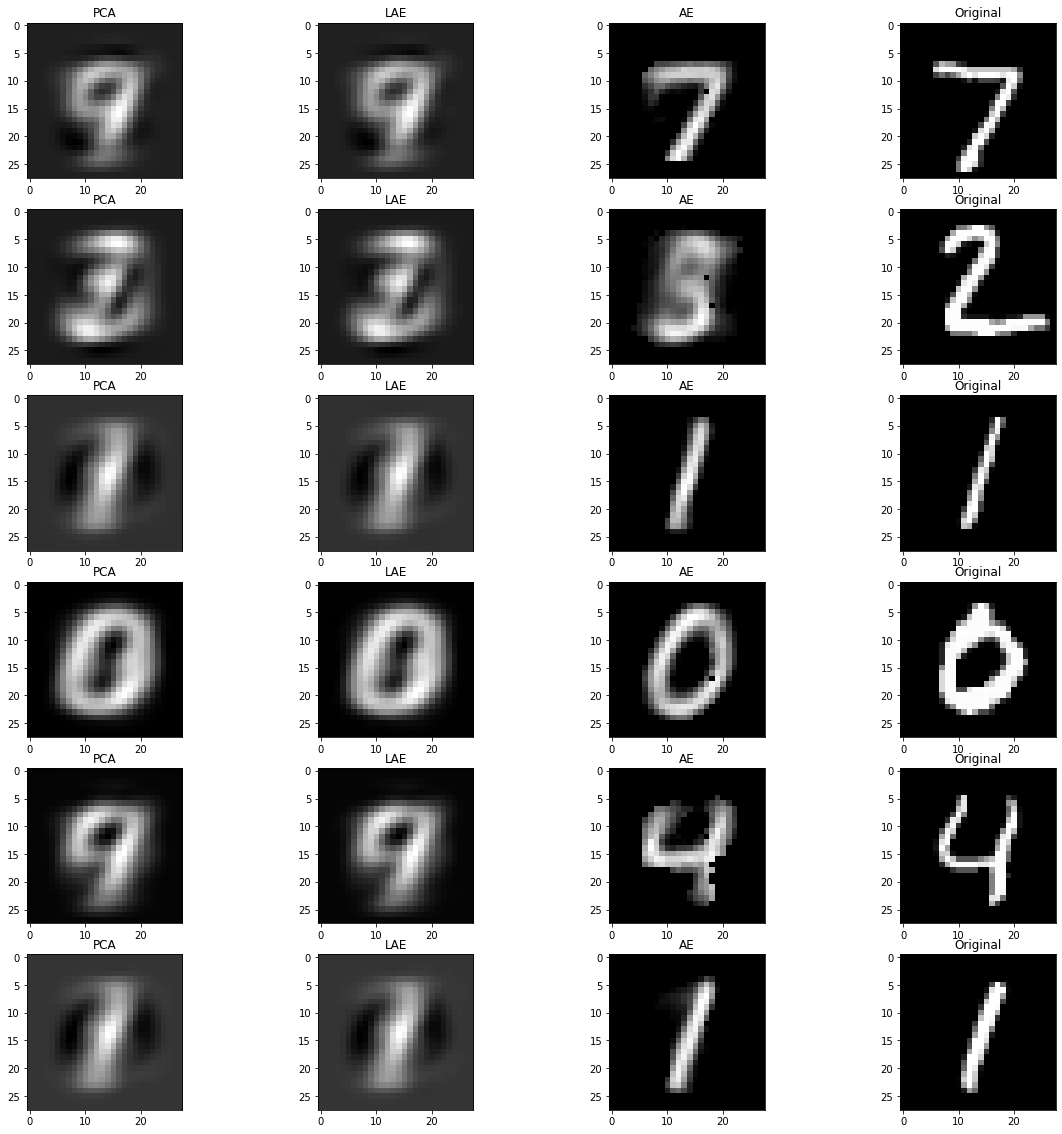

In [20]:
# your code here

fig, ax = plt.subplots(6,4,figsize=(20, 20))
# take the first 6 images of x_test
for i in range(6):
    ax[i,0].set_title('PCA')
    ax[i,0].imshow(pca_recons_x_test[i,:,:], cmap='gray')
    ax[i,1].set_title('LAE')
    ax[i,1].imshow(lae_recons_x_test[i,:,:], cmap='gray')
    ax[i,2].set_title('AE')
    ax[i,2].imshow(ae_recons_x_test[i,:,:], cmap='gray')
    ax[i,3].set_title('Original')
    ax[i,3].imshow(x_test[i,:,:], cmap='gray')   

<div class='alert alert-block' style='border-color:rgb(201, 201, 201); border-style:dashed; border-width: 3px'><div class='alert alert-block alert-primary'><b>Question : </b><span style = 'color:black'>Q1.13
</span></div><div class='alert alert-block alert-info'><b>Comments : </b><span style = 'color:black'>Ok
</span></div></div>

**1.14** [2pts] Finally, using `sklearn.metrics`'s `mean_squared_error`, report the average reconstruction error across the entire test set for PCA, LAE, and AE. Does the ordering agree with what you've seen in the previous questions? Does it support your conclusion in **1.8**?


In [21]:
# your code here

n = x_test.shape[0]

pca_mse = mean_squared_error(x_test.reshape(n, -1), pca_recons_x_test.reshape(n, -1))
lae_mse = mean_squared_error(x_test.reshape(n, -1), lae_recons_x_test.reshape(n, -1))
ae_mse = mean_squared_error(x_test.reshape(n, -1), ae_recons_x_test.reshape(n, -1))

print("\nPCA Mean Squared Error = {}\n".format(pca_mse))
print("Linear Auto-Encoder Mean Squared Error = {}\n".format(lae_mse))
print("Non-Linear Auto-Encoder Mean Squared Error = {}\n".format(ae_mse))


PCA Mean Squared Error = 0.055669490892550966

Linear Auto-Encoder Mean Squared Error = 0.055667486875029086

Non-Linear Auto-Encoder Mean Squared Error = 0.0418338337588013



<div style="border: 2px solid red; padding: 10px"> 

***Observations:***
* LAE MSE is almost the same as PCA. 
* This supports our answer in 1.8 and 1.9, where PCA and LAE do an exactly similar job of seperation.
* AE is doing the best job of encoding because it captures the non-linear complexity of the image as well. 
* This is also in-line with the observation from the visual plots above, where AE reconstructed images are of much better quality compared to PCA or LAE.

<div class='alert alert-block' style='border-color:rgb(201, 201, 201); border-style:dashed; border-width: 3px'><div class='alert alert-block alert-primary'><b>Question : </b><span style = 'color:black'>Q1.14
</span></div><div class='alert alert-block alert-info'><b>Comments : </b><span style = 'color:black'>Ok
</span></div></div>

<div class='exercise'><b> Question 2: Convolutional Autoencoders and Outlier Detection [50pts total] </b></div>

For this question, we will be using a modified version of a subset of MNIST. We have hidden some images of handwritten letters in the dataset `data/cs109b-mnist-mix.csv` amongst thousands of handwritten digits. The dataset is provided as a csv, where each row is an image, and each column gives the value of a given pixel in a flattened 28 by 28 image. It would be very tedious to have humans flip through every image to find the letters, so instead we will exploit a neat feature of autoencoders, outlier detection. This method turns a disadvantage of autoencoders, namely, their inability to properly reconstruct data very dissimilar to what they were trained on, into an advantage. 

You will also be constructing a convolutional autoencoder, which tends to work a lot better for reconstructing images, all while using substantially fewer parameters.

**2.1** [2pts] Load and normalize (by dividing by 255) the modified dataset from `data/cs109b-mnist-mix.csv`, and reshape it to (-1, 28, 28), saving the array as `x_cs109b`. Using `imshow` and `cmap='gray'`, plot one image of your choice from this dataset.

**2.2** [15pts] Create a convolutional autoencoder called `cae`. This time you don't need separate references to the encoder and decoder parts since we only intend to use the full autoencoder. You may use a combination of `Conv2D`, `MaxPooling2D`, `Flatten`, `Dense`, `Reshape`, and `UpSampling2D` layers. You may use any number of these layers, and if you are unfamiliar with any of these layers we encourage you to look at their TF Keras documentation. You will have to experiment with an appropriate bottleneck size to complete the rest of question **2**. As always, print the `summary()` of your model.

**2.3** [10pts] Train your convolutional autoencoder on `x_train` (from **problem 1**, MNIST), using `x_test` as validation data. Plot the train/validation loss versus epoch. This will adapt the convolutional autoencoder to the type of data we expect, handwritten digits.

**2.4** [4pts] Pass `x_test` through your convolutional autoencoder (CAE), calling the resulting reconstruction of the dataset `cae_recons_x_test`. To see how well your CAE is performing, we will visually inspect some of its reconstructions. Make an array of subplots of 6 rows and 2 columns, with the rows being different elements of the test set (your choice) and the columns being the CAE reconstruction and the Original image. How good is the reconstruction? How does it compare to the reconstruction of your dense autoencoder from **1.13**?

**2.5** [4pts] Construct an instance of `tf.keras.losses.MeanSquaredError(reduction=tf.keras.losses.Reduction.NONE)` and use it to calculate the MSE reconstruction error of every element in `x_test`. Save this array as `mse_x_test`; you want this output to be a 1D array so consider the required shapes of what you feed in to the `MeanSquaredError` object. We will now pass the mystery dataset through the CAE: reconstruct `x_cs109b`, saving the result as `cae_recons_x_cs109b`. Compute the reconstruction errors, saving the result as `mse_x_cs109b`.

**2.6** [5pts] Using subplots, plot the histograms of `mse_x_test` and `mse_x_cs109b` side-by-side. For the most part, do they look like they are coming from similar types of data? Pick a reasonable threshold value for reconstruction error based on the histogram for `mse_x_cs109b`; plot this threshold as a vertical line on the histogram. Be sure to explain your choice of threshold. Beyond this threshold, you will examine the images to see if you can find letters. Print how many images lie beyond this threshold.

**2.7** [10pts] Use the subset of data determined by your threshold to find the letters in `x_cs109b`, displaying them as images. Show your work! Create a 2-column table indicating the letter (e.g., 'a') and the index where it is located (e.g. '9728'). There are a few letters total. To get full credit you need to find most of them (you should not need to examine more than a few tens of images - if so, consider a different threshold in **2.6** or check your CAE performance).

You will have been able to find the majority of the letters hidden in the dataset of thousands of images, while only having to manually look at 1/100th of the dataset. This demonstrates how autoencoders could be used as a cheap preprocessing step to draw out the most "interesting" data.


## Answers

**2.1** [2pts] Load and normalize (by dividing by 255) the modified dataset from `data/cs109b-mnist-mix.csv`, and reshape it to (-1, 28, 28), saving the array as `x_cs109b`. Using `imshow` and `cmap='gray'`, plot one image of your choice from this dataset.


In [22]:
# your code here
path = '../data/cs109b-mnist-mix.csv'
x_cs109b = np.genfromtxt(path, delimiter=',').reshape(-1,28,28)/255.0

print("Num of Images = {}".format(x_cs109b.shape[0]))
print("Size of Image = {}".format(x_cs109b.shape[1:]))

Num of Images = 3067
Size of Image = (28, 28)


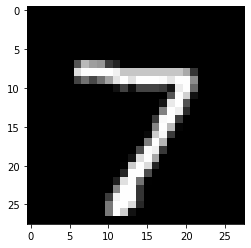

In [23]:
# your code here

plt.imshow(x_cs109b[0,:,:], cmap='gray')
plt.show()

<div class='alert alert-block' style='border-color:rgb(201, 201, 201); border-style:dashed; border-width: 3px'><div class='alert alert-block alert-primary'><b>Question : </b><span style = 'color:black'>Q2.1
</span></div><div class='alert alert-block alert-info'><b>Comments : </b><span style = 'color:black'>Correct
</span></div></div>

**2.2** [15pts] Create a convolutional autoencoder called `cae`. This time you don't need separate references to the encoder and decoder parts since we only intend to use the full autoencoder. You may use a combination of `Conv2D`, `MaxPooling2D`, `Flatten`, `Dense`, `Reshape`, and `UpSampling2D` layers. You may use any number of these layers, and if you are unfamiliar with any of these layers we encourage you to look at their TF Keras documentation. You will have to experiment with an appropriate bottleneck size to complete the rest of question **2**. As always, print the `summary()` of your model.


In [24]:
input_dim = x_cs109b.shape[1:]
encoding_dim = 8

# encoder
cae = Sequential()
cae.add(Input(shape=(input_dim)))
cae.add(Reshape(target_shape=(input_dim[0], input_dim[1], 1)))

cae.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
cae.add(MaxPooling2D(pool_size=(2, 2)))

cae.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
cae.add(MaxPooling2D(pool_size=(2, 2)))

cae.add(Flatten())
cae.add(Dense(encoding_dim, activation='relu'))

# decoder
cae.add(Dense(6272, activation='relu'))
cae.add(Reshape(target_shape=(7,7,128)))

cae.add(UpSampling2D(size=(2, 2)))
cae.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))

cae.add(UpSampling2D(size=(2, 2)))
cae.add(Conv2D(1, kernel_size=(3, 3), activation='relu', padding='same'))
cae.add(Reshape(target_shape=input_dim))

cae.compile(optimizer='adam', loss='mse')

print(cae.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_2 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 8)                

<div class='alert alert-block' style='border-color:rgb(201, 201, 201); border-style:dashed; border-width: 3px'><div class='alert alert-block alert-primary'><b>Question : </b><span style = 'color:black'>Q2.2
</span></div><div class='alert alert-block alert-info'><b>Comments : </b><span style = 'color:black'>Final activation function is not ideal; sigmoid or hard sigmoid is better, for the range(-1)
</span></div><div class='alert alert-block alert-danger'><b>Deduction : </b><span style = 'color:black'>-1
</span></div></div>

**2.3** [10pts] Train your convolutional autoencoder on `x_train` (from **problem 1**, MNIST), using `x_test` as validation data. Plot the train/validation loss versus epoch. This will adapt the convolutional autoencoder to the type of data we expect, handwritten digits.


In [25]:
# your code here

try:
    cae.load_weights('./model/cae8_1')
    _history = pickle.load(open( "./model/trainHistoryDict8_1", "rb" ))
except:   
    history = cae.fit(x_train, x_train,
                      epochs=100,
                      batch_size=8,
                      shuffle=True,
                      validation_data=(x_test, x_test),
                      verbose = 0,
                      callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]
                     )
    
    cae.save_weights('./model/cae8_1')
    
    with open('./model/trainHistoryDict8_1', 'wb') as file_pi:
        pickle.dump(history.history, file_pi)
    
    _history = history.history

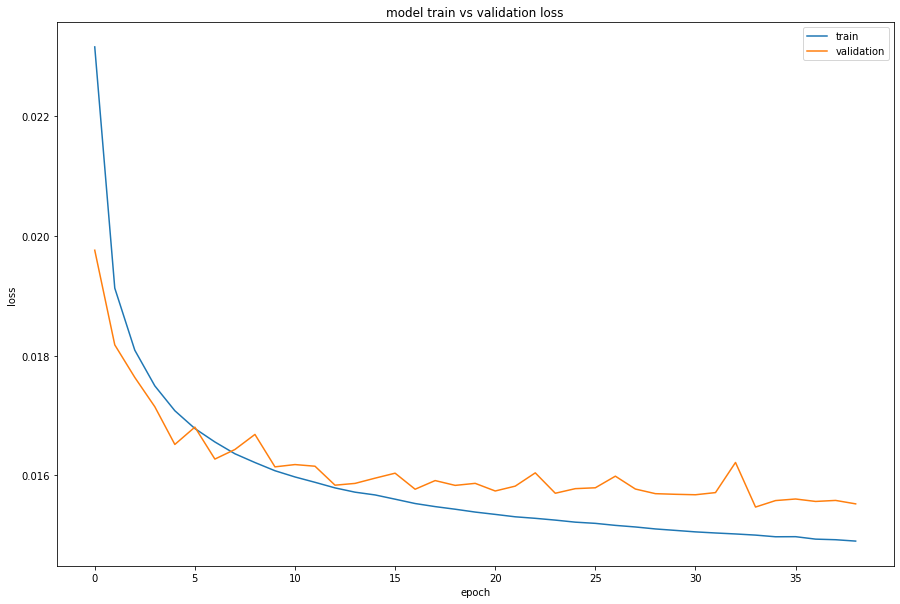

In [26]:
# your code here

plt.figure(figsize=(15, 10))
plt.plot(_history['loss'])
plt.plot(_history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

<div class='alert alert-block' style='border-color:rgb(201, 201, 201); border-style:dashed; border-width: 3px'><div class='alert alert-block alert-primary'><b>Question : </b><span style = 'color:black'>Q2.3
</span></div><div class='alert alert-block alert-info'><b>Comments : </b><span style = 'color:black'>Correct
</span></div></div>

**2.4** [4pts] Pass `x_test` through your convolutional autoencoder (CAE), calling the resulting reconstruction of the dataset `cae_recons_x_test`. To see how well your CAE is performing, we will visually inspect some of its reconstructions. Make an array of subplots of 6 rows and 2 columns, with the rows being different elements of the test set (your choice) and the columns being the CAE reconstruction and the Original image. How good is the reconstruction? How does it compare to the reconstruction of your dense autoencoder from **1.13**?


In [27]:
# your code here
cae_recons_x_test = cae.predict(x_test)

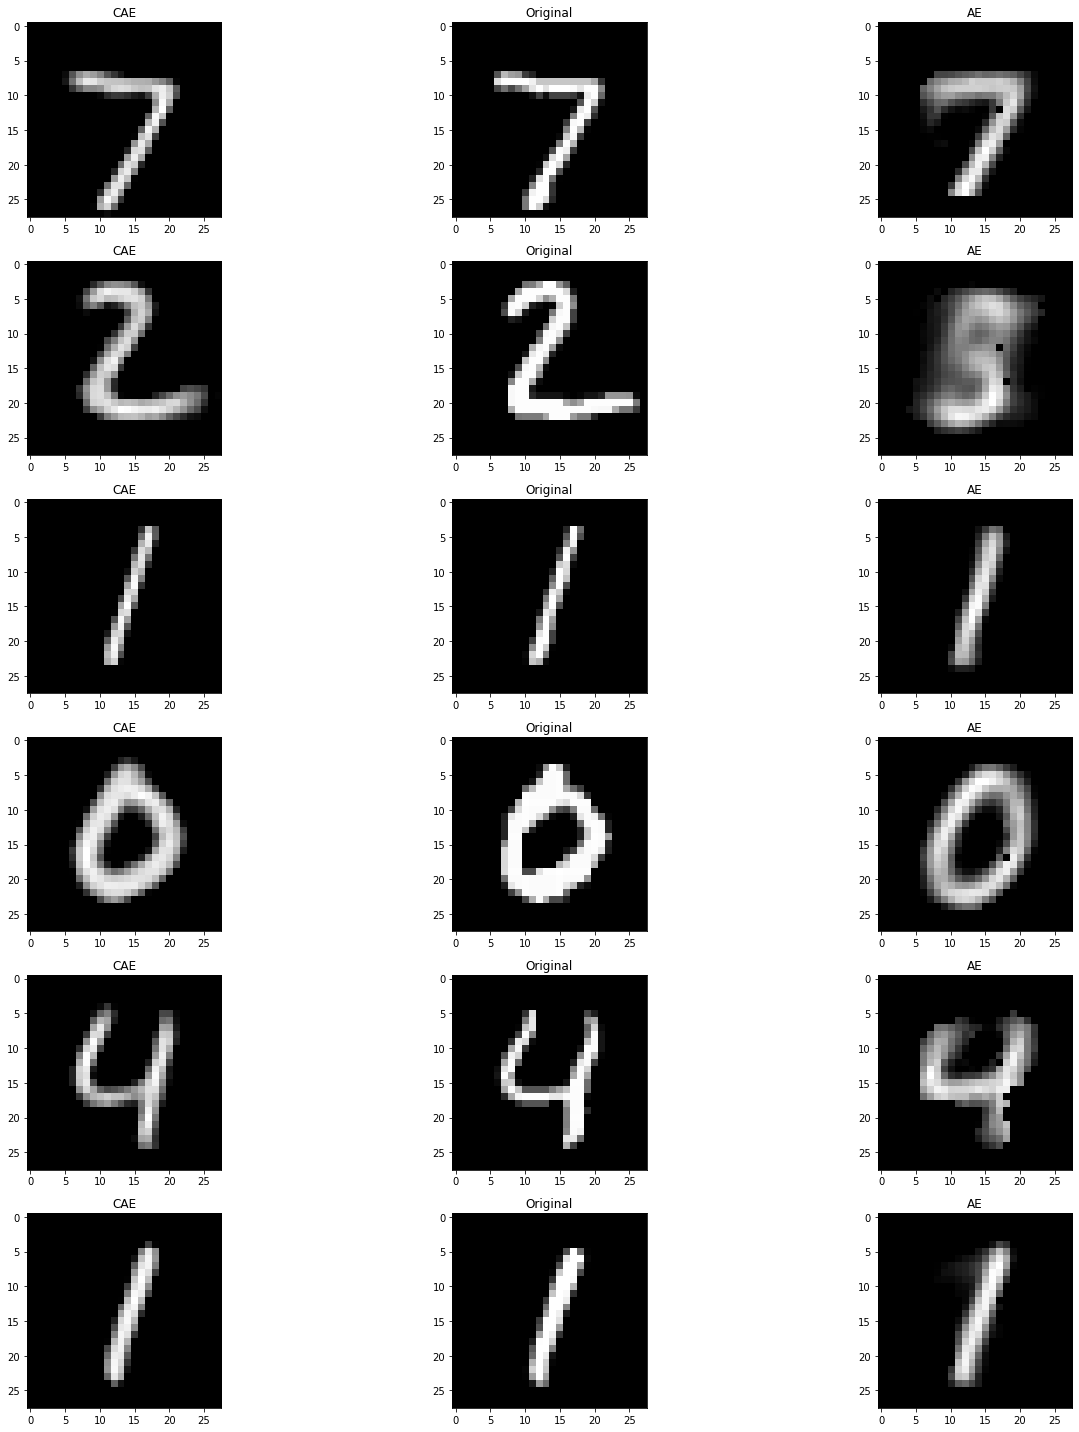

In [28]:
# your code here

fig, ax = plt.subplots(6,3,figsize=(20, 20))
# take the first 6 images of x_test
for i in range(6):
    ax[i,0].set_title('CAE')
    ax[i,0].imshow(cae_recons_x_test[i,:,:], cmap='gray')
    ax[i,1].set_title('Original')
    ax[i,1].imshow(x_test[i,:,:], cmap='gray')   
    ax[i,2].set_title('AE')
    ax[i,2].imshow(ae_recons_x_test[i,:,:], cmap='gray')   

plt.tight_layout()
plt.show()

In [29]:
n = x_test.shape[0]
print("\nCAE Mean Squared Error = {}\n".format(mean_squared_error(x_test.reshape(n, -1), 
                                                                  cae_recons_x_test.reshape(n, -1))))


CAE Mean Squared Error = 0.015467547383617174



<div style="border: 2px solid red; padding: 10px"> 

***Observations:***
* **The reconstruction is very close to the original image, particularly in light on encoding dimension of 8.**
* Reconstruction error of this Convolution Autoencoder is less than that of the dense autoencoder or PCA. 
* Looking at the plots above, CAE's reconstructed image is much clearer than the one from the dense autoencoder. 
* Look at the number 2 here for starter; the difference in the reconstructed image quality is really obvious. 
* In case of dense autoencoder, the number 2 (image id 1) can be wrongfully classified as the number 3.
* MSE is much lower for CAE (0.015) i.e. less than half for PCA, LAE, or AE.

<br>

**However, we need to take into account the difference in encoding dimensions ie. 2 in case of dense autoencoder and 8 in case of convolution autoencoder**
* Some of the improvement in reconstruction quality is also associated with the increase in encoding dimensions.

<div class='alert alert-block' style='border-color:rgb(201, 201, 201); border-style:dashed; border-width: 3px'><div class='alert alert-block alert-primary'><b>Question : </b><span style = 'color:black'>Q2.4
</span></div><div class='alert alert-block alert-info'><b>Comments : </b><span style = 'color:black'>Correct
</span></div></div>

**2.5** [4pts] Construct an instance of `tf.keras.losses.MeanSquaredError(reduction=tf.keras.losses.Reduction.NONE)` and use it to calculate the MSE reconstruction error of every element in `x_test`. Save this array as `mse_x_test`; you want this output to be a 1D array so consider the required shapes of what you feed in to the `MeanSquaredError` object. We will now pass the mystery dataset through the CAE: reconstruct `x_cs109b`, saving the result as `cae_recons_x_cs109b`. Compute the reconstruction errors, saving the result as `mse_x_cs109b`.


In [30]:
# your code here
mse = tf.keras.losses.MeanSquaredError(reduction=tf.keras.losses.Reduction.NONE)
mse_x_test = mse(x_test.reshape(x_test.shape[0],-1), cae_recons_x_test.reshape(x_test.shape[0],-1))
mse_x_test.shape

TensorShape([10000])

In [31]:
# your code here
cae_recons_x_cs109b = cae.predict(x_cs109b)
mse_x_cs109b = mse(x_cs109b.reshape(x_cs109b.shape[0],-1), cae_recons_x_cs109b.reshape(x_cs109b.shape[0],-1))
mse_x_cs109b.shape

TensorShape([3067])

<div class='alert alert-block' style='border-color:rgb(201, 201, 201); border-style:dashed; border-width: 3px'><div class='alert alert-block alert-primary'><b>Question : </b><span style = 'color:black'>Q2.5
</span></div><div class='alert alert-block alert-info'><b>Comments : </b><span style = 'color:black'>Ok
</span></div></div>

**2.6** [5pts] Using subplots, plot the histograms of `mse_x_test` and `mse_x_cs109b` side-by-side. For the most part, do they look like they are coming from similar types of data? Pick a reasonable threshold value for reconstruction error based on the histogram for `mse_x_cs109b`; plot this threshold as a vertical line on the histogram. Be sure to explain your choice of threshold. Beyond this threshold, you will examine the images to see if you can find letters. Print how many images lie beyond this threshold.


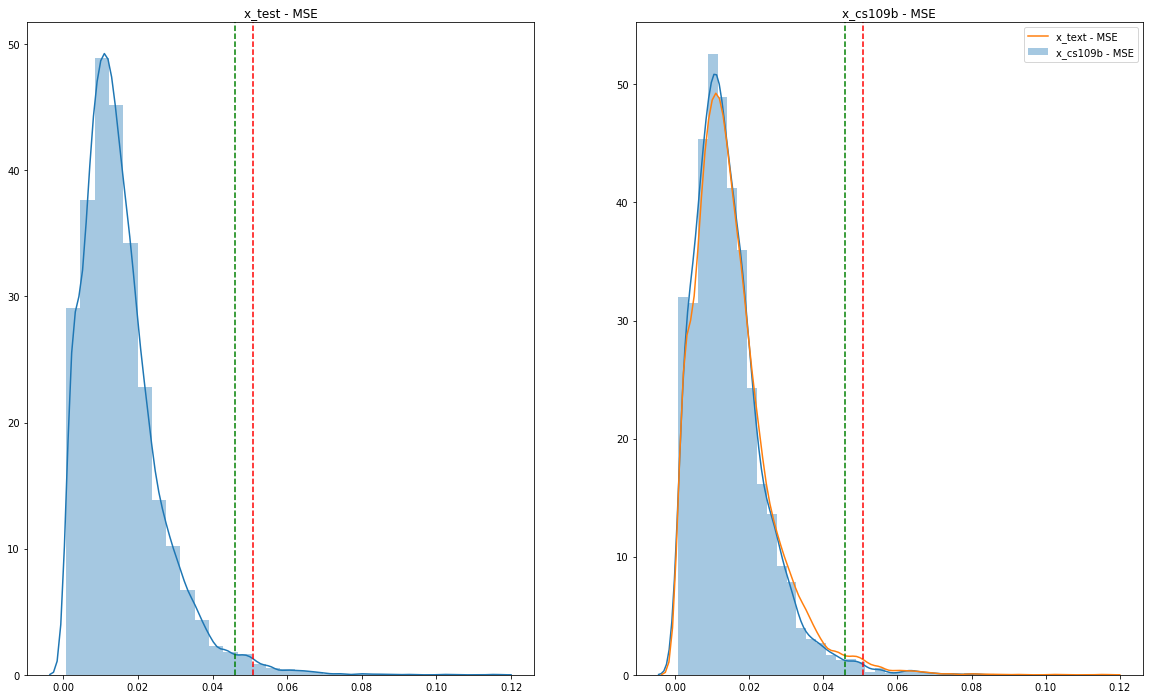

In [32]:
# your code here

bins = 30

cutoff1 = 0.05075
cutoff2 = 0.046

fig, [ax1, ax2] = plt.subplots(1,2,figsize=(20, 12), sharey=True)
ax1 = plt.subplot(1,2,1)
sns.distplot(mse_x_test, bins=bins)
ax1.axvline(cutoff1, ls='--', c='r')
ax1.axvline(cutoff2, ls='--', c='g')
ax1.set_title('x_test - MSE')

ax2 = plt.subplot(1,2,2)
sns.distplot(mse_x_cs109b, bins=bins, label='x_cs109b - MSE')
sns.kdeplot(mse_x_test.numpy(), label='x_text - MSE')
ax2.axvline(cutoff1, ls='--', c='r')
ax2.axvline(cutoff2, ls='--', c='g')
ax2.set_title('x_cs109b - MSE')

plt.show()


Number of Images beyond cut-off MSE of 0.05075 = 20



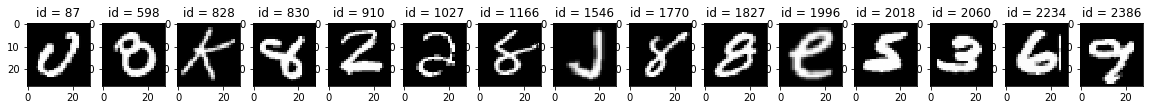

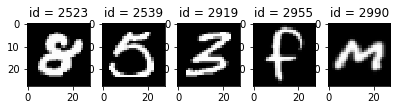

In [33]:
# your code here

img_ids = tf.where(mse_x_cs109b > cutoff1).numpy().flatten()
print('\nNumber of Images beyond cut-off MSE of {} = {}\n'.format(cutoff1, len(img_ids)))

ax=[]

for idx in range(len(img_ids)):
    if idx%15==0:
        plt.figure(figsize=(20,3))
    ax.append(plt.subplot(1,15,(idx%15)+1))
    plt.imshow(x_cs109b[img_ids[idx],:,:], cmap='gray')
    ax[-1].set_title('id = {}'.format(img_ids[idx]))

plt.show()


Number of Images beyond cut-off MSE of 0.046 = 39



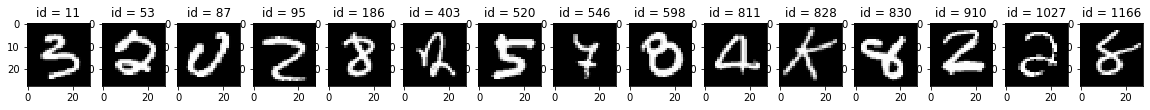

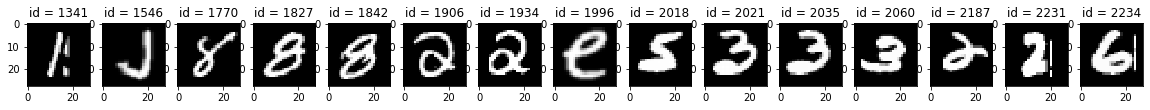

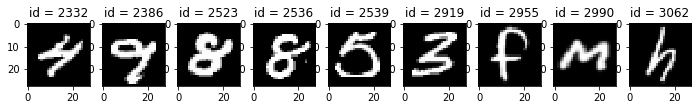

In [34]:
# your code here

img_ids = tf.where(mse_x_cs109b > cutoff2).numpy().flatten()
print('\nNumber of Images beyond cut-off MSE of {} = {}\n'.format(cutoff2, len(img_ids)))

ax=[]

for idx in range(len(img_ids)):
    if idx%15==0:
        plt.figure(figsize=(20,3))
    ax.append(plt.subplot(1,15,(idx%15)+1))
    plt.imshow(x_cs109b[img_ids[idx],:,:], cmap='gray')
    ax[-1].set_title('id = {}'.format(img_ids[idx]))

plt.show()

<div style="border: 2px solid red; padding: 10px"> 

MSE threshold|Reasoning behind the threshold|No of Images|No of Letters|Letters
--------|--------------------------------------------------------------------------|---|--|----------------
0.05075 |Explanation below*                            |20 |5 |K, J, e, f, M
0.04600 |Trail and error to find maixmum letters within resonable number of images |39 |6 |K, J, e, f, M, h

***Explanation for threshold of 0.05075:***
* Threshold beyond 99% AUC ie. small number of outlier images.
* Threshold with significant deviation between the expected height of histogram (based on KDE) and the actual height.
* Threshold with sudden drop or increase in data points between x_test and cs109b_x_test plots.

<div class='alert alert-block' style='border-color:rgb(201, 201, 201); border-style:dashed; border-width: 3px'><div class='alert alert-block alert-primary'><b>Question : </b><span style = 'color:black'>Q2.6
</span></div><div class='alert alert-block alert-info'><b>Comments : </b><span style = 'color:black'>Correct
</span></div></div>

**2.7** [10pts] Use the subset of data determined by your threshold to find the letters in `x_cs109b`, displaying them as images. Show your work! Create a 2-column table indicating the letter (e.g., 'a') and the index where it is located (e.g. '9728'). There are a few letters total. To get full credit you need to find most of them (you should not need to examine more than a few tens of images - if so, consider a different threshold in **2.6** or check your CAE performance).

You will have been able to find the majority of the letters hidden in the dataset of thousands of images, while only having to manually look at 1/100th of the dataset. This demonstrates how autoencoders could be used as a cheap preprocessing step to draw out the most "interesting" data.

,letter,index
0,k,828
1,j,1546
2,e,1996
3,f,2955
4,m,2990
5,h,3062


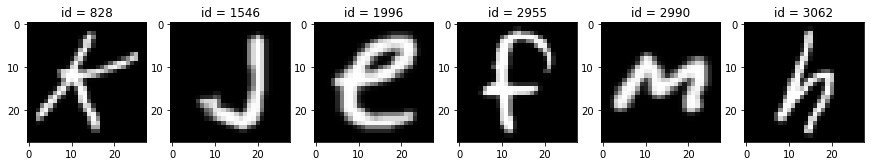

In [35]:
# your code here
import pandas as pd
d = pd.DataFrame({'letter':['k','j','e','f','m', 'h'], 'index':[828, 1546, 1996, 2955, 2990, 3062]})
display(d)

fig, ax = plt.subplots(1,len(d), figsize=(15,3))
for i in range(len(d)):
    ax[i].imshow(x_cs109b[d['index'].iloc[i],:,:], cmap='gray')
    ax[i].set_title('id = {}'.format(d['index'].iloc[i]))
    

<div style="border: 2px solid red; padding: 10px"> 

***Letters Discovered:***

MSE threshold|No of Letters|Letters
-------------|-------------|----------------
0.051        |5            |K, J, e, f, M
0.046        |6            |K, J, e, f, M, h

<div class='alert alert-block' style='border-color:rgb(201, 201, 201); border-style:dashed; border-width: 3px'><div class='alert alert-block alert-primary'><b>Question : </b><span style = 'color:black'>Q2.7
</span></div><div class='alert alert-block alert-info'><b>Comments : </b><span style = 'color:black'>Correct. Good job finidng all the letters.
</span></div></div>

# End of Assignment

<div class='alert alert-block' style='border-color:rgb(201, 201, 201); border-style:dashed; border-width: 3px'><div class='alert alert-block alert-primary'><b>Question : </b><span style = 'color:black'>QOverall
</span></div><div class='alert alert-block alert-info'><b>Comments : </b><span style = 'color:black'>I think you did a very solid job in the problem set. You took the time to understand and explain the subtleties of the methods. Keep up the good work!
</span></div></div>

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#999; background:#fff;">
Graded by: Ioana Zelko
</footer>